# **Abstract**:
The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).

# **Data Set Information**:
The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

# **Attribute Information**:
# Bank client data :
**Age** (numeric)

**Job** : type of job (categorical: 'admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown')

**Marital**: marital status (categorical: 'divorced', 'married', 'single', 'unknown' ; note: 'divorced' means divorced or widowed)

**Education** (categorical: 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown')

**Default**: has credit in default? (categorical: 'no', 'yes', 'unknown')

**Housing**: has housing loan? (categorical: 'no', 'yes', 'unknown')

**Loan**: has personal loan? (categorical: 'no', 'yes', 'unknown')
Related with the last contact of the current campaign:

**Contact**: contact communication type (categorical:
'cellular','telephone')

**Month**: last contact month of year (categorical: 'jan', 'feb', 'mar',
…, 'nov', 'dec')

**Dayofweek**: last contact day of the week (categorical:
'mon','tue','wed','thu','fri')

**Duration**: last contact duration, in seconds (numeric). Important
note: this attribute highly affects the output target (e.g., if
duration=0 then y='no'). Yet, the duration is not known before a call
is performed. Also, after the end of the call y is obviously known.
Thus, this input should only be included for benchmark purposes and
should be discarded if the intention is to have a realistic
predictive model.

#Other attributes:

**Campaign**: number of contacts performed during this campaign and for
this client (numeric, includes last contact)

**Pdays**: number of days that passed by after the client was last
contacted from a previous campaign (numeric; 999 means client was not
previously contacted)

**Previous**: number of contacts performed before this campaign and for
this client (numeric)

**Poutcome**: outcome of the previous marketing campaign (categorical:
'failure','nonexistent','success')

# **Social and economic context attributes**
**Emp.var.rate**: employment variation rate - quarterly indicator
(numeric)

**Cons.price.idx**: consumer price index - monthly indicator (numeric)

**Cons.conf.idx**: consumer confidence index - monthly indicator
(numeric)

**Euribor3m**: euribor 3 month rate - daily indicator (numeric)

**Nr.employed**: number of employees - quarterly indicator (numeric)

**Output variable** (desired target):
y - has the client subscribed a term deposit? (binary: 'yes', 'no')

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra

import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt #for data visualization.

import seaborn as sns
sns.set(rc={'figure.figsize':(14,7)})

import random
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bank-marketing/bank-additional-names.txt
/kaggle/input/bank-marketing/bank-additional-full.csv


In [2]:
bdata=pd.read_csv("../input/bank-marketing/bank-additional-full.csv",sep=";"  ) #adding data to pandas.

bdata.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


# Describe

In [3]:
bdata.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [4]:
bdata.job.value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

Text(0, 0.5, 'Number of People')

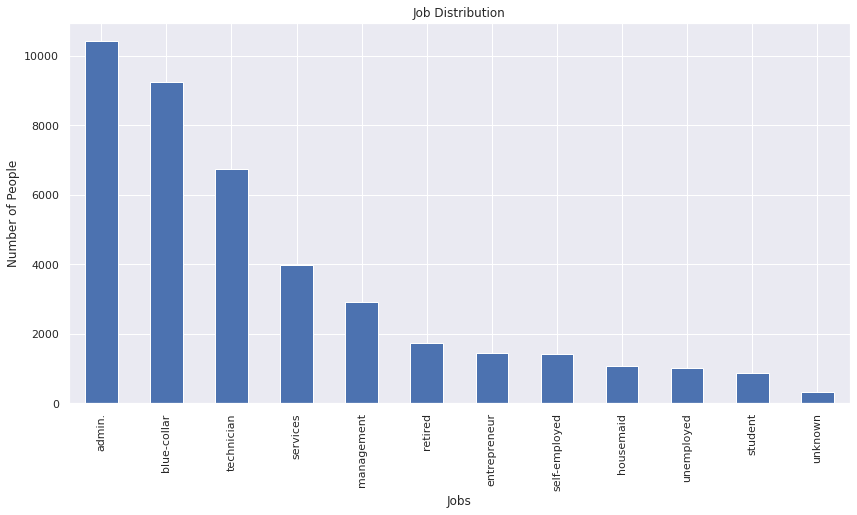

In [5]:
bdata.job.value_counts().plot(kind="bar")
plt.title("Job Distribution")
plt.xlabel("Jobs")
plt.ylabel("Number of People")

In [6]:
bdata.job.value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

Text(0.5, 0, 'Marital Status')

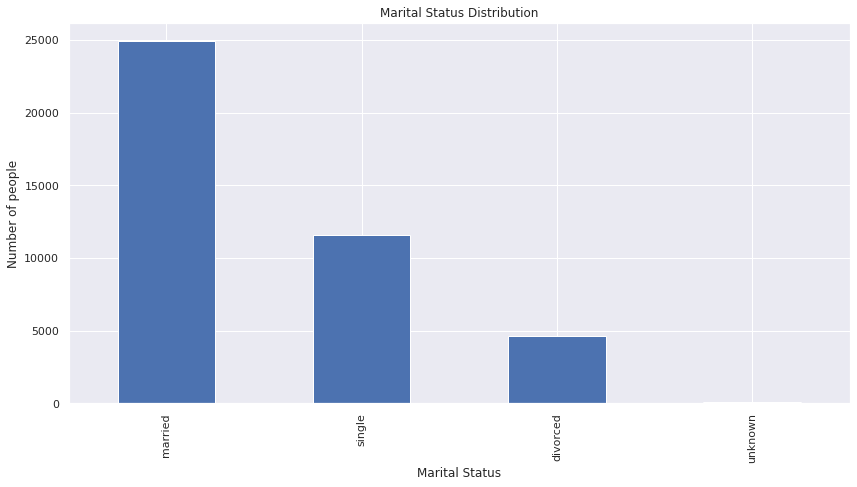

In [7]:
bdata.marital.value_counts().plot(kind="bar")
plt.title("Marital Status Distribution")
plt.ylabel("Number of people")
plt.xlabel("Marital Status")

Text(0, 0.5, 'Number of People')

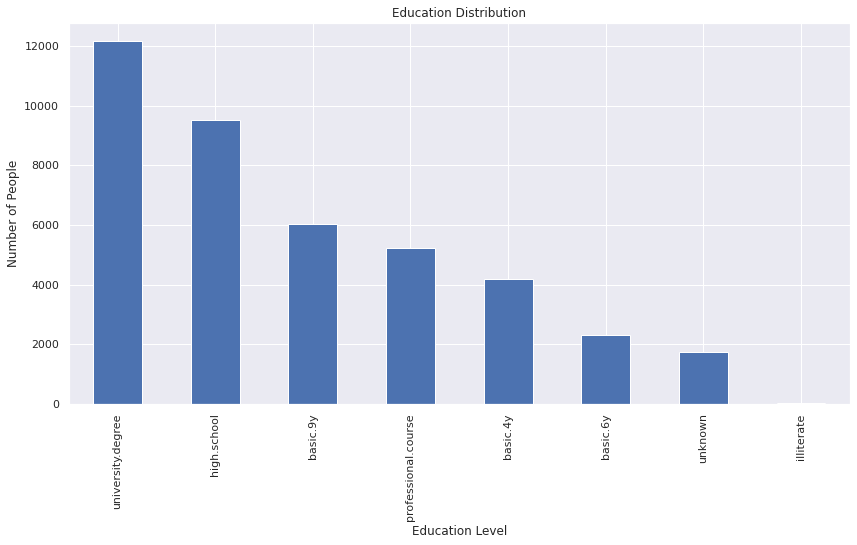

In [8]:
bdata.education.value_counts().plot(kind="bar")
plt.title("Education Distribution")
plt.xlabel("Education Level")
plt.ylabel("Number of People")

# **Age/Default**

<AxesSubplot:xlabel='age', ylabel='Density'>

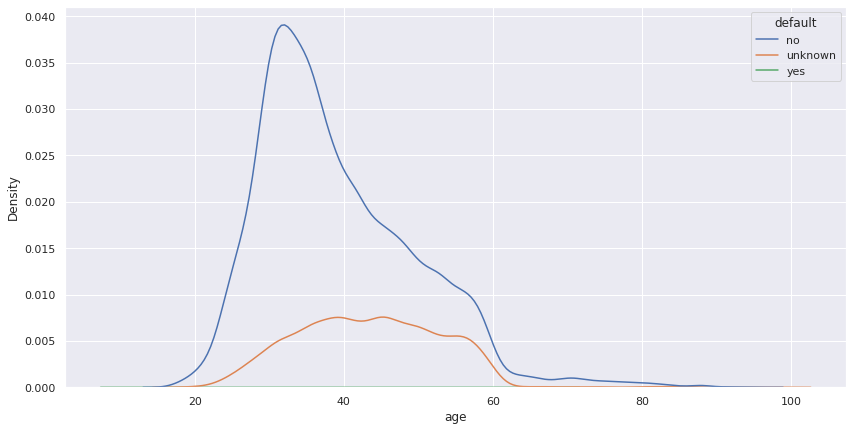

In [9]:
sns.kdeplot(data=bdata, x="age", hue="default")

# **Age/Housing**

<AxesSubplot:xlabel='age', ylabel='Density'>

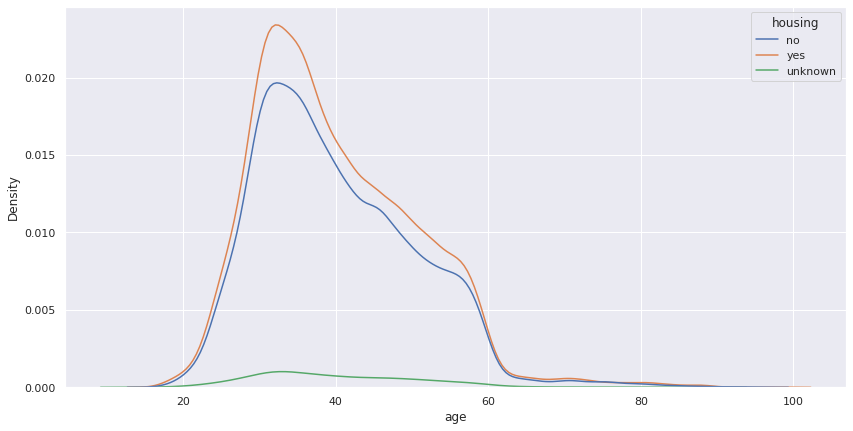

In [10]:
sns.kdeplot(data=bdata, x="age", hue="housing")

# **Age/Loan**

<AxesSubplot:xlabel='age', ylabel='Density'>

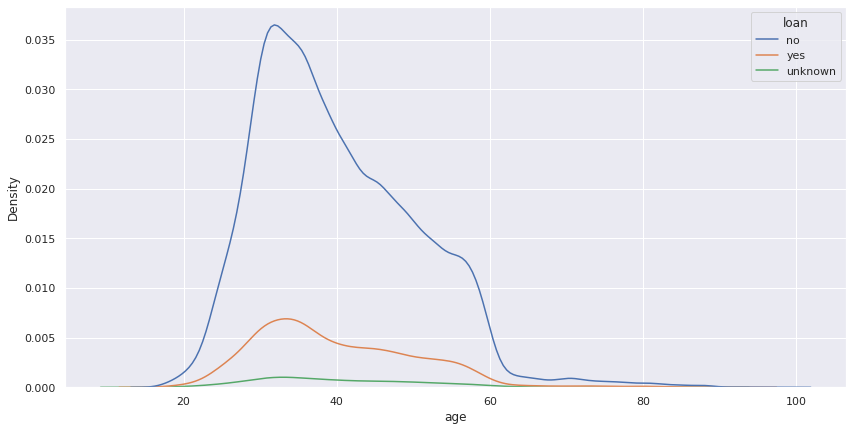

In [11]:
sns.kdeplot(data=bdata, x="age", hue="loan")

# **Age/Y**

<AxesSubplot:xlabel='age', ylabel='Density'>

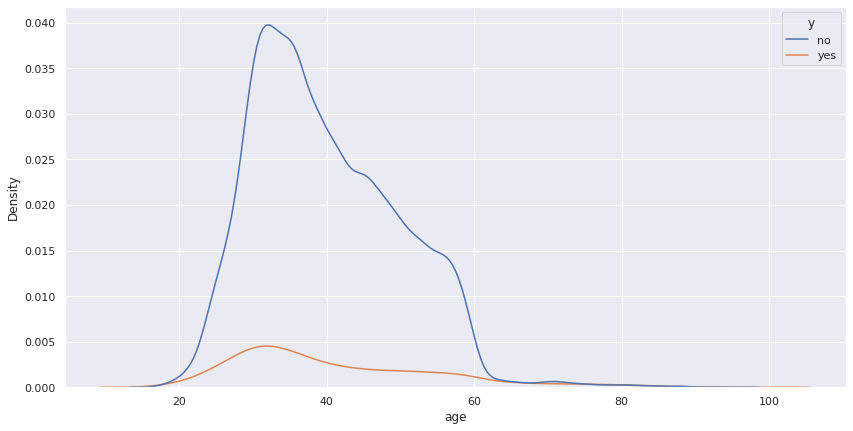

In [12]:
sns.kdeplot(data=bdata, x="age", hue="y")

# **Age/Marital**

<AxesSubplot:xlabel='age', ylabel='Density'>

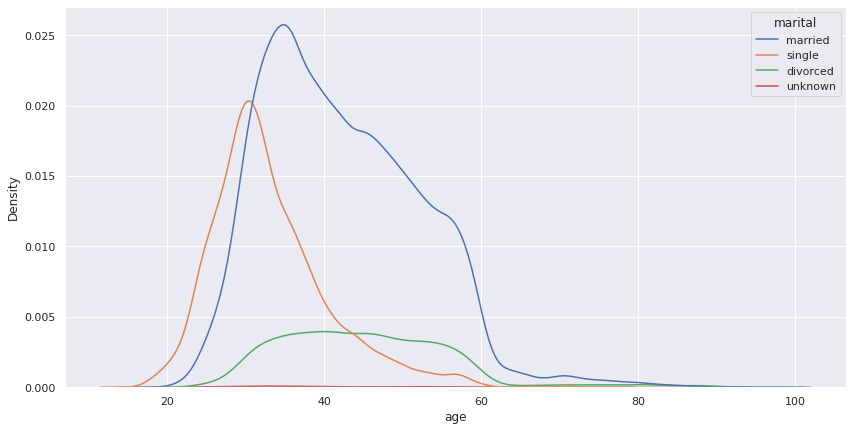

In [13]:
sns.kdeplot(data=bdata, x="age", hue="marital")

# **Age/Jobs**

<AxesSubplot:xlabel='age', ylabel='Density'>

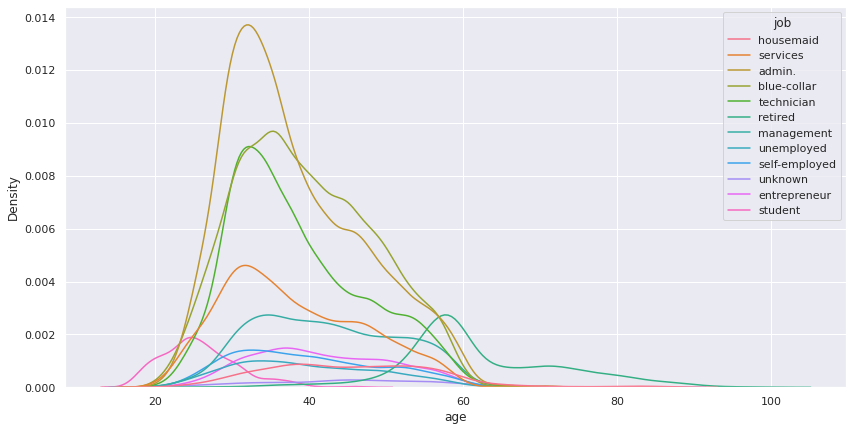

In [14]:
sns.kdeplot(data=bdata, x="age", hue="job")

# **Age/Education**

<AxesSubplot:xlabel='age', ylabel='Density'>

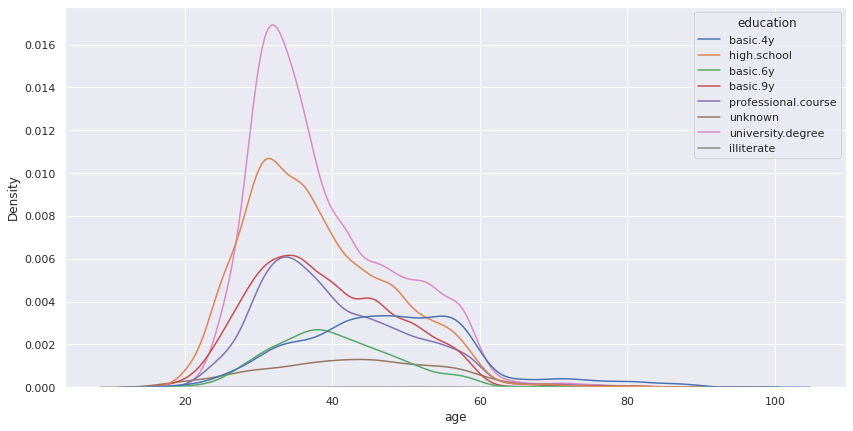

In [15]:
sns.kdeplot(data=bdata, x="age", hue="education")

# **Histograms from quantitative variables**

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

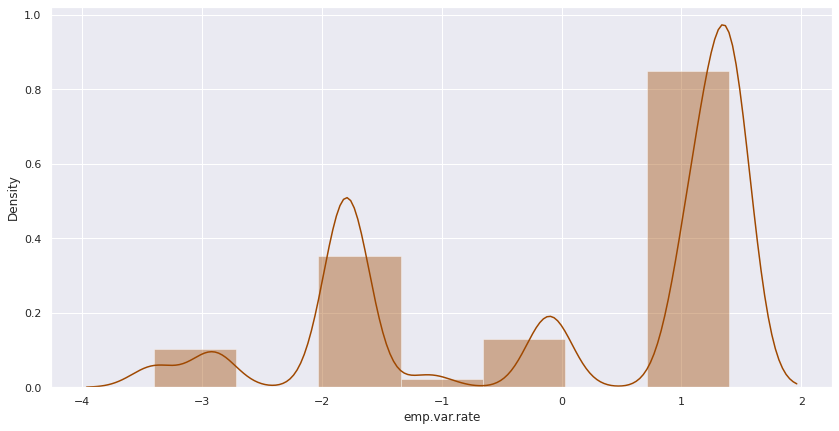

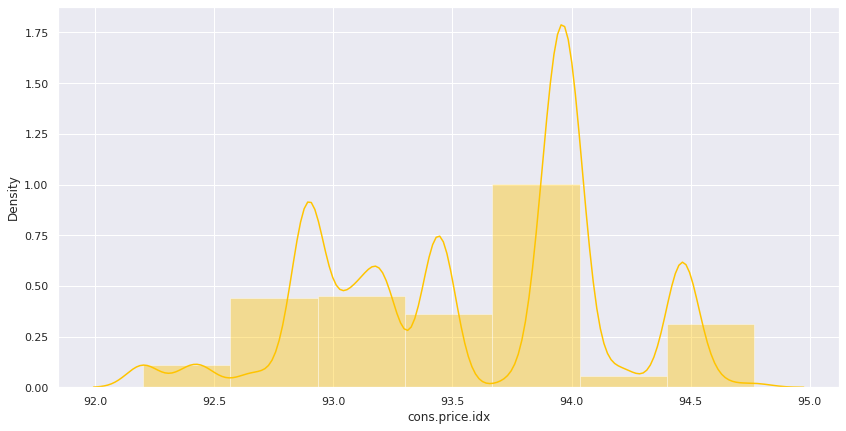

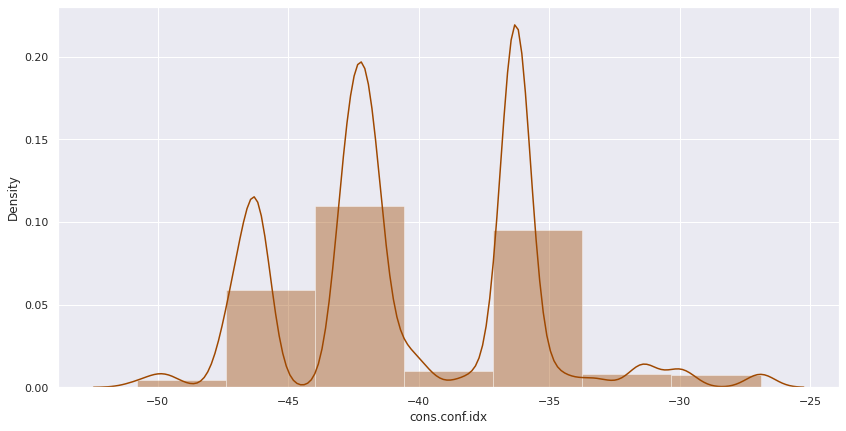

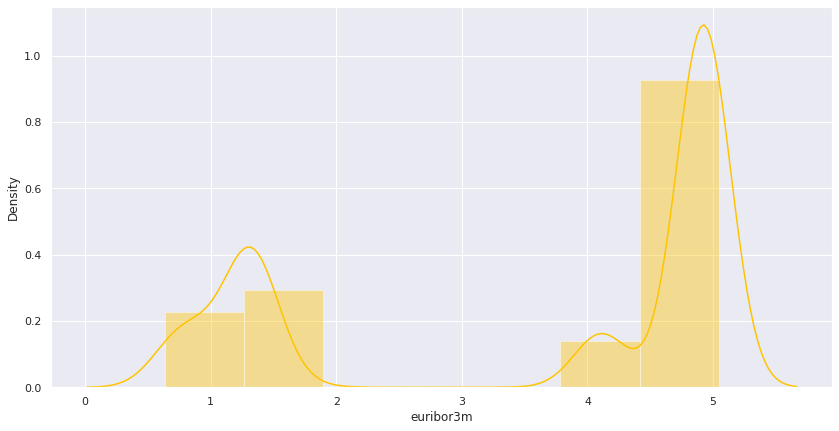

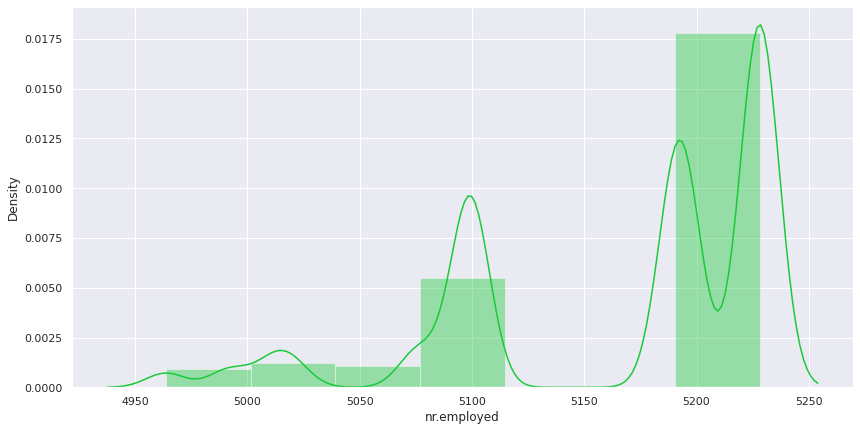

In [16]:

palette = sns.color_palette("bright")
for col in bdata.select_dtypes('float64'):
    
    plt.figure()
    sns.distplot(bdata[col], bins=7, color= random.choice(palette) )

# **Pie Charts**

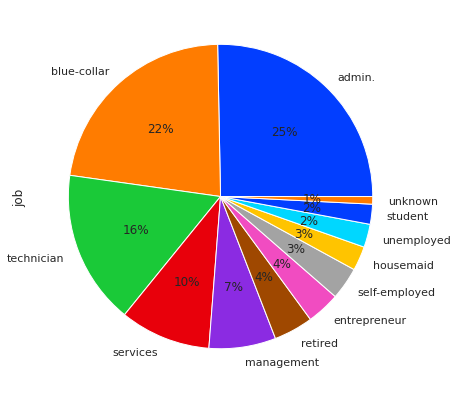

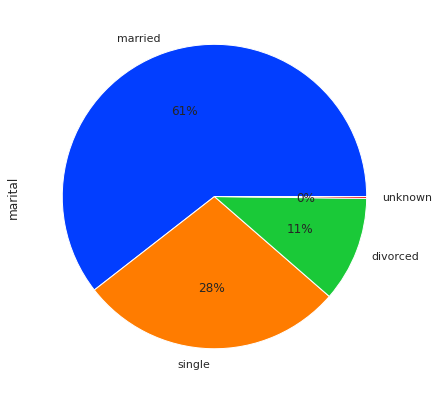

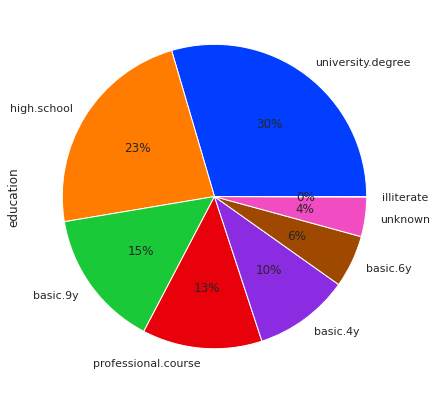

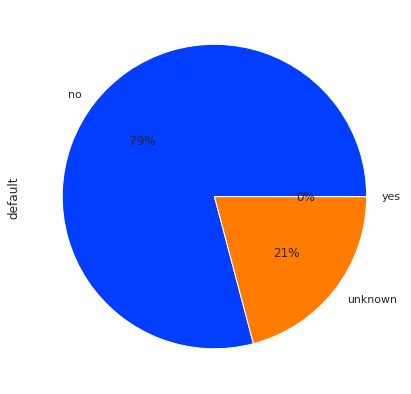

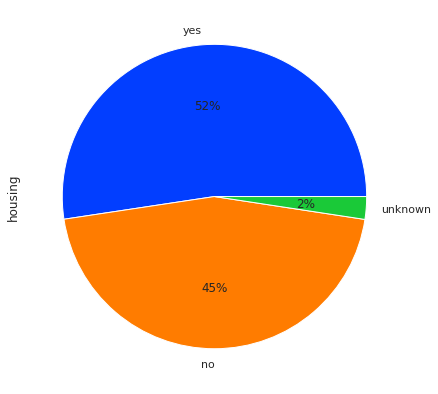

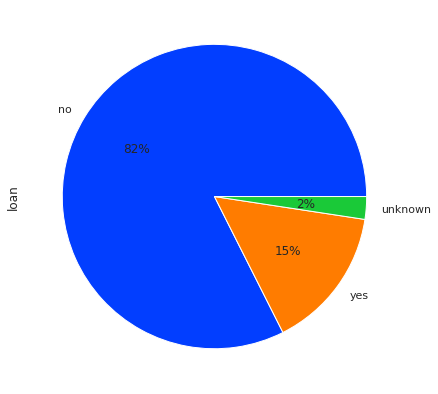

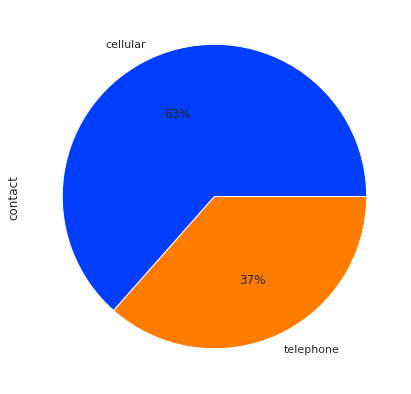

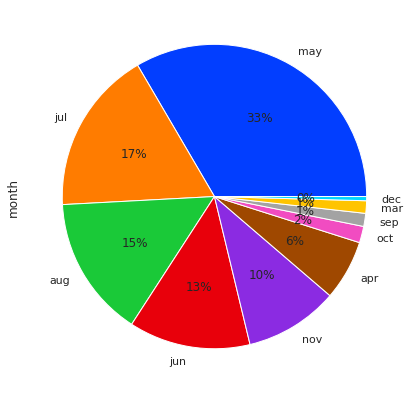

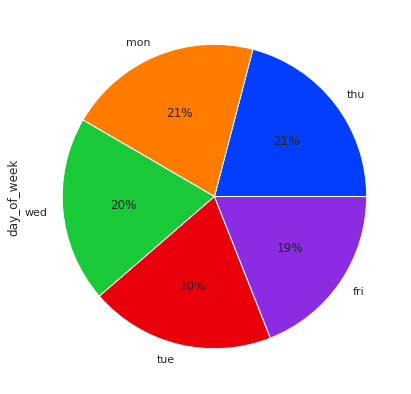

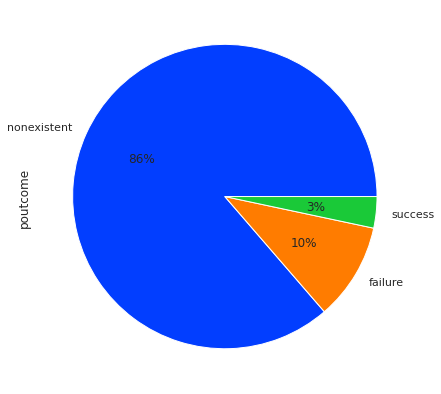

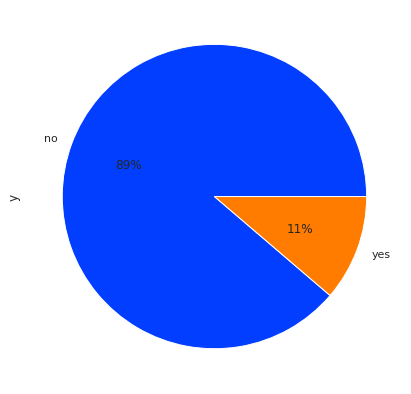

<Figure size 1008x504 with 0 Axes>

In [17]:
for col in bdata.select_dtypes('object'):
    
    # define Seaborn color palette to use
    palette_color = sns.color_palette('bright')
  
    # plotting data on chart
    bdata[col].value_counts().plot.pie( colors=palette_color, autopct='%.0f%%')
    plt.figure()

# **Creation of subsets**

<AxesSubplot:xlabel='age', ylabel='count'>

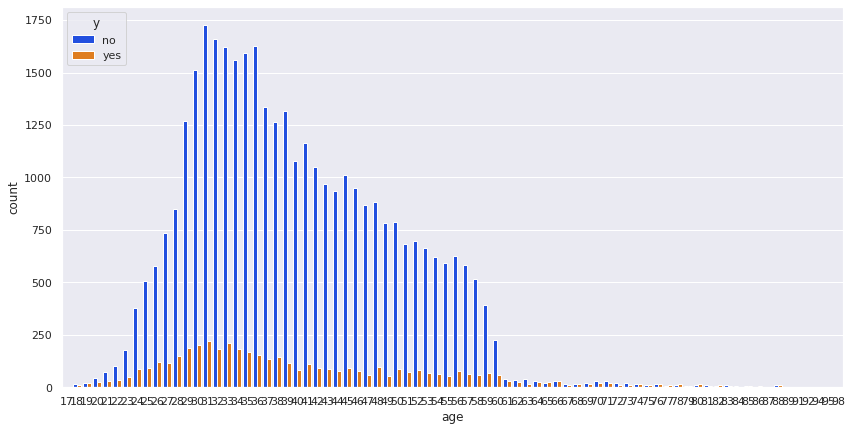

In [18]:
sns.countplot(x ='age', hue = 'y', data = bdata , palette ="bright",)

# **Scatter Matrix**

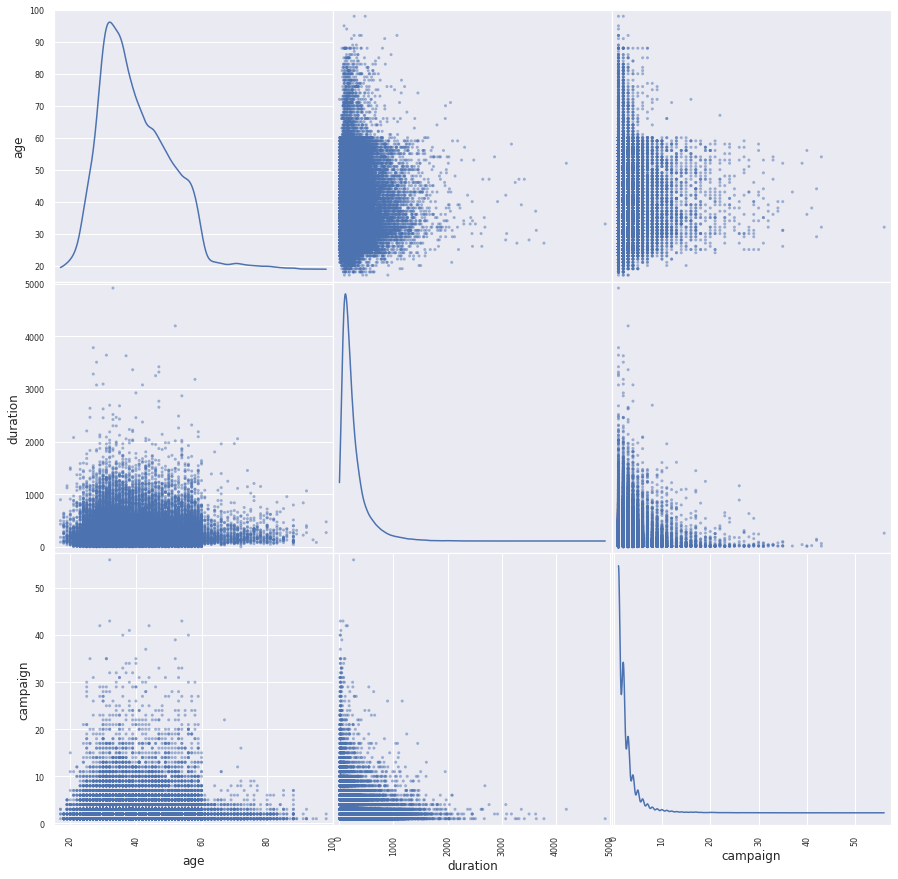

In [19]:
pd.plotting.scatter_matrix( bdata[["age", "duration", "campaign"]],
    figsize = (15, 15),
    diagonal = "kde")
plt.show()

# **Histogram**

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'duration'}>,
        <AxesSubplot:title={'center':'campaign'}>],
       [<AxesSubplot:title={'center':'pdays'}>,
        <AxesSubplot:title={'center':'previous'}>,
        <AxesSubplot:title={'center':'emp.var.rate'}>],
       [<AxesSubplot:title={'center':'cons.price.idx'}>,
        <AxesSubplot:title={'center':'cons.conf.idx'}>,
        <AxesSubplot:title={'center':'euribor3m'}>],
       [<AxesSubplot:title={'center':'nr.employed'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

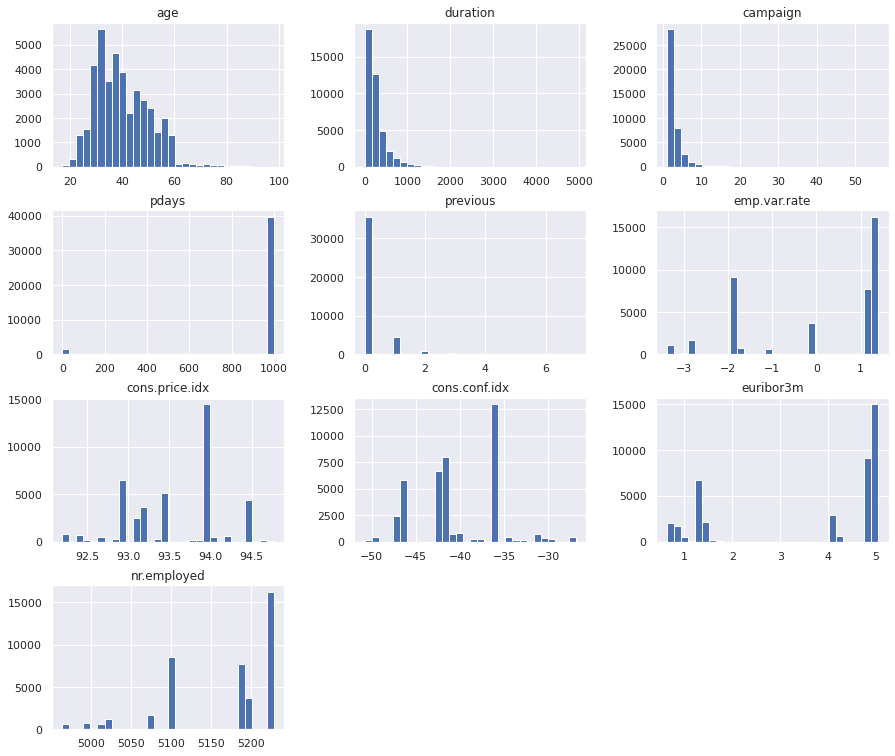

In [20]:
bdata.hist(bins=30, figsize=(15,13))


# **BoxPlots**

**Age/Marital**

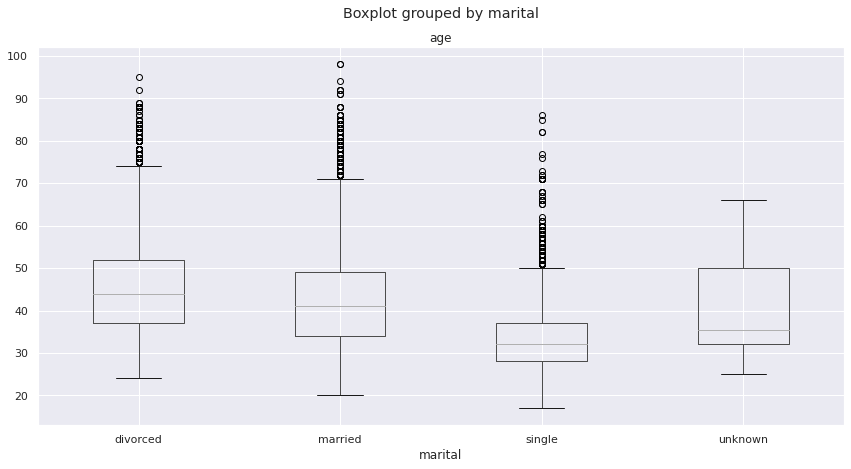

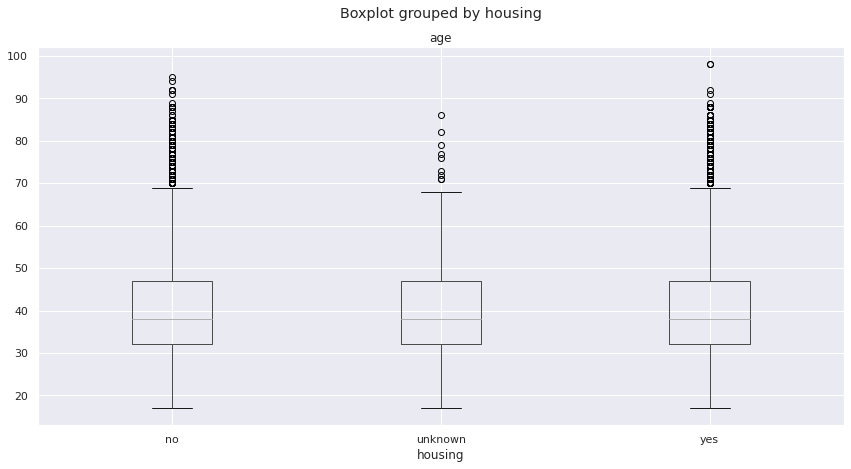

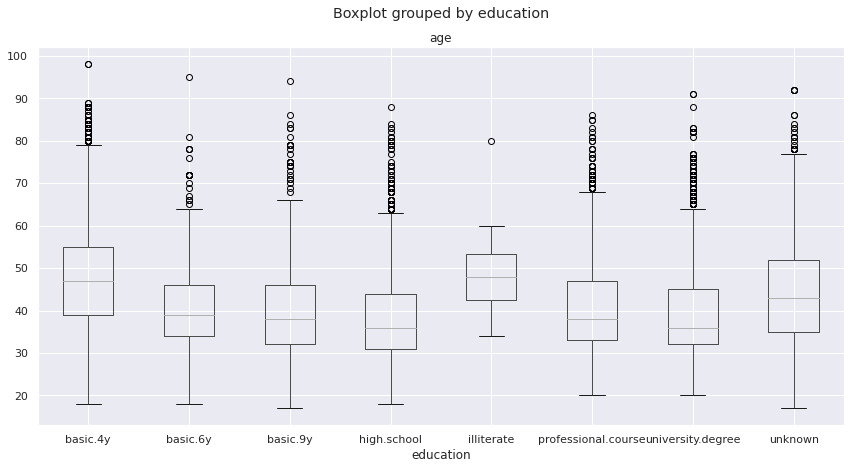

In [21]:
list1 =  ["marital","housing","education"]
for i in list1:
    bdata.boxplot(column="age", by= i,figsize= (14,7))

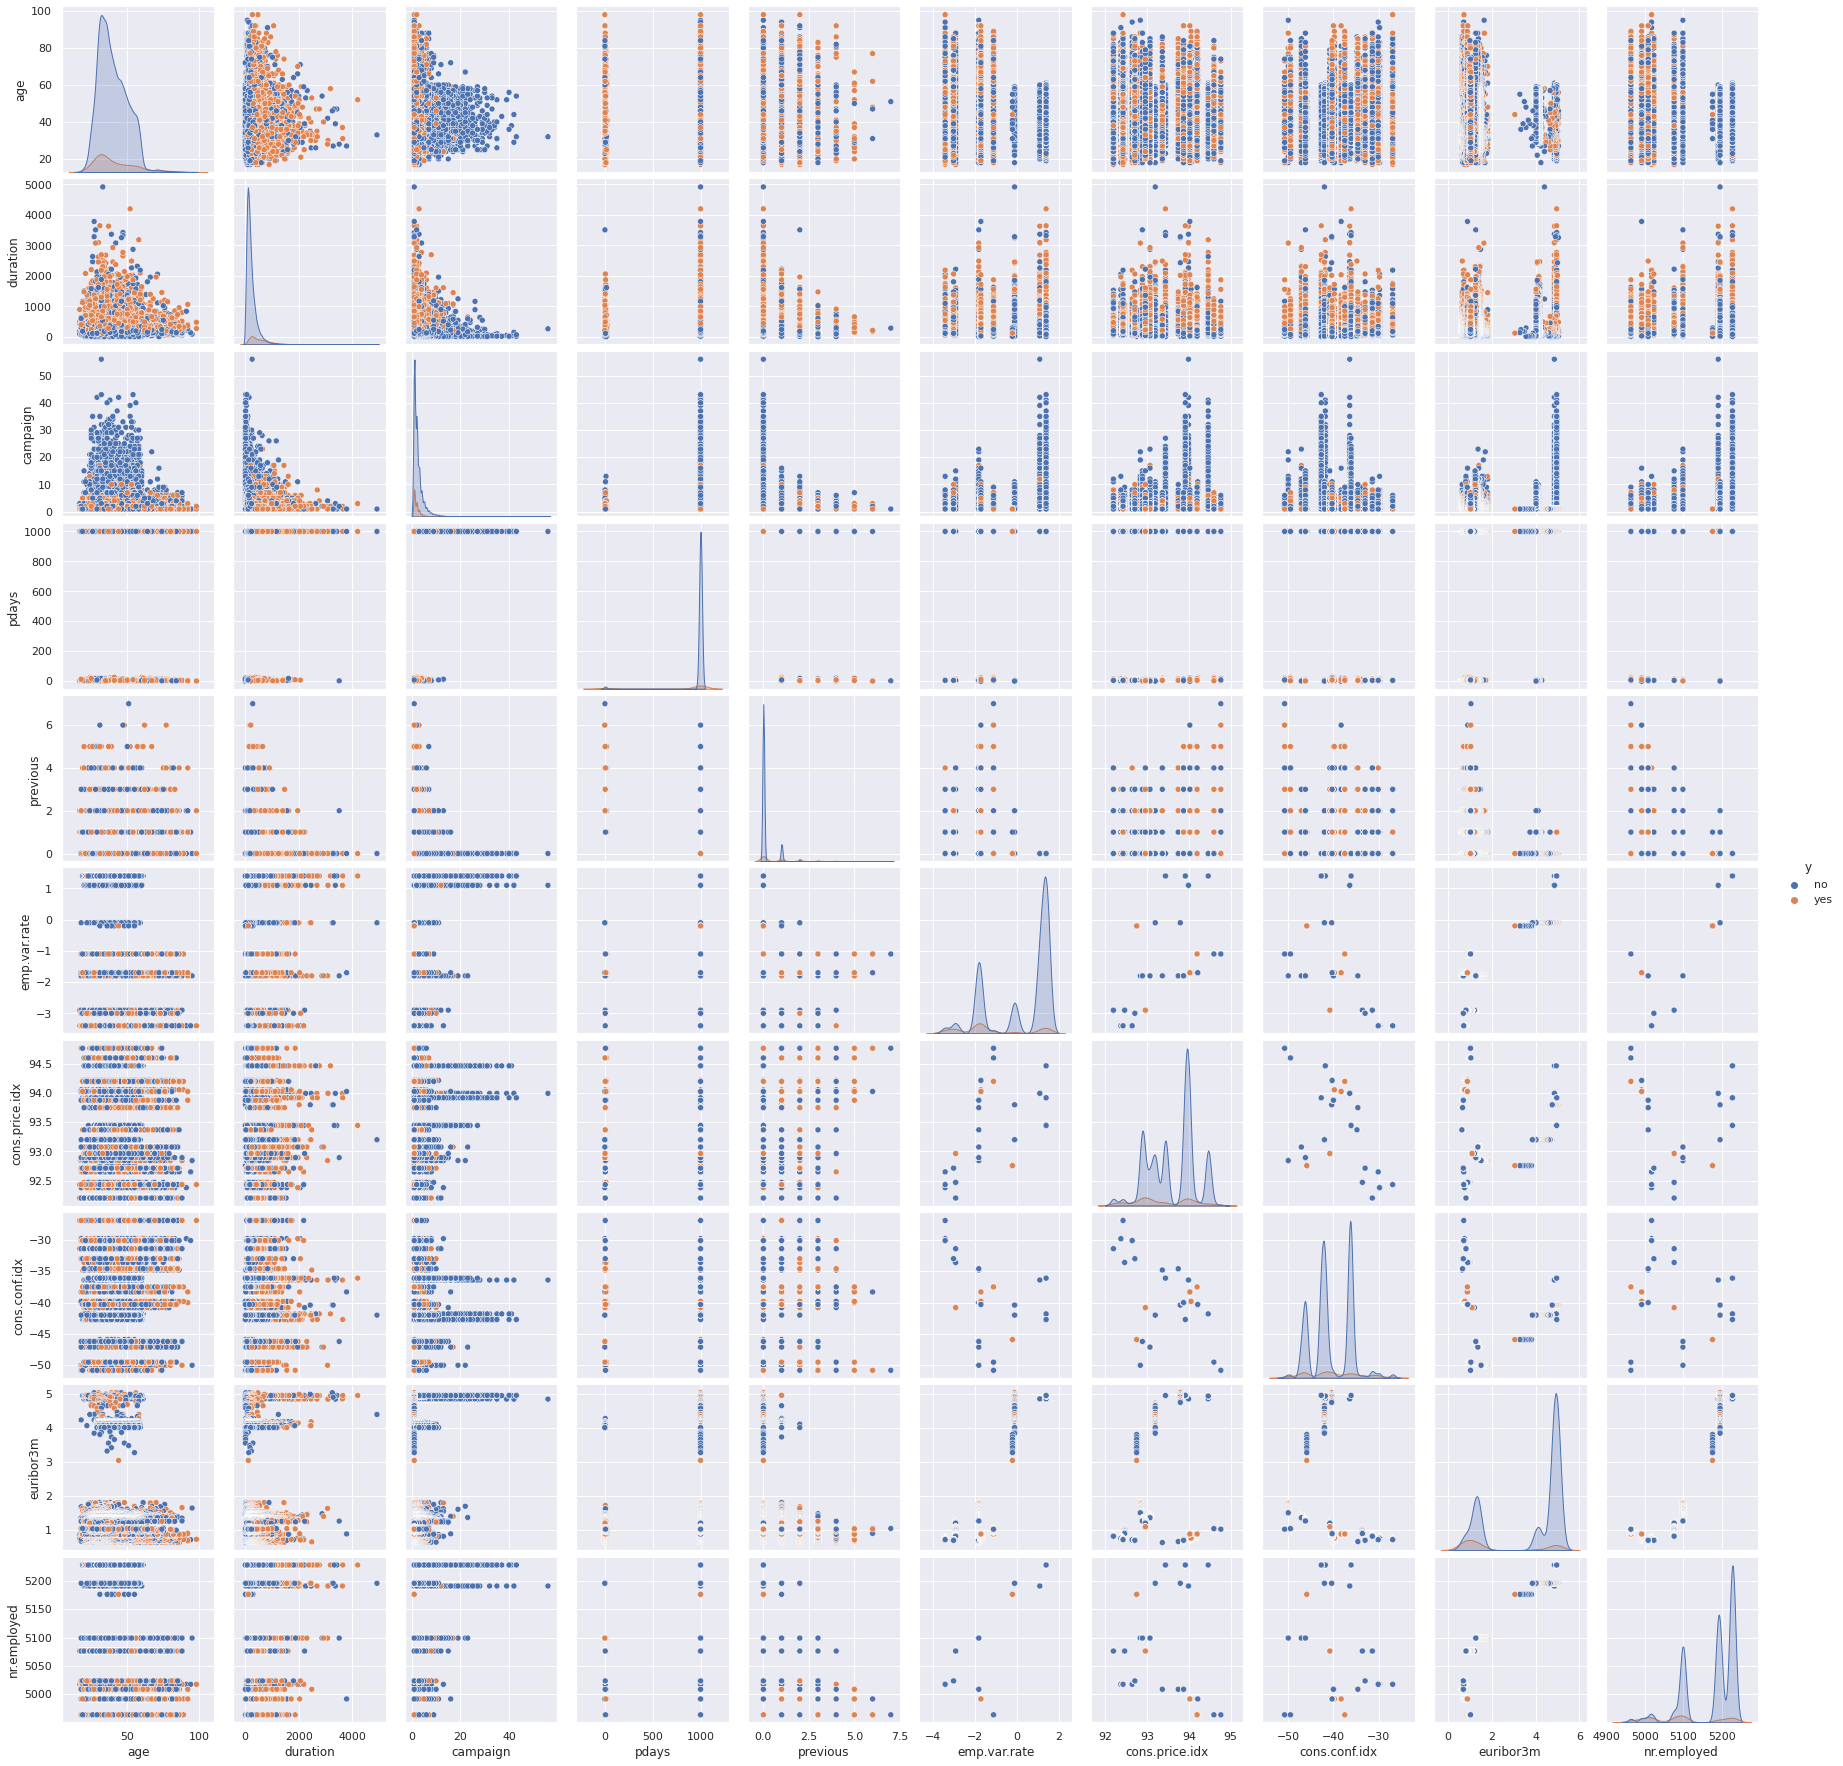

In [22]:
sns.pairplot(bdata,hue="y")